Data description: https://archive.ics.uci.edu/ml/datasets/automobile

This project is about predicting car price using KNN regressor model.

In [1]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# 1. Prepare data

## Attribute Information:

Attribute: Attribute Range

1. symboling: -3, -2, -1, 0, 1, 2, 3.
2. normalized-losses: continuous from 65 to 256.
3. make:
alfa-romero, audi, bmw, chevrolet, dodge, honda,
isuzu, jaguar, mazda, mercedes-benz, mercury,
mitsubishi, nissan, peugot, plymouth, porsche,
renault, saab, subaru, toyota, volkswagen, volvo

4. fuel-type: diesel, gas.
5. aspiration: std, turbo.
6. num-of-doors: four, two.
7. body-style: hardtop, wagon, sedan, hatchback, convertible.
8. drive-wheels: 4wd, fwd, rwd.
9. engine-location: front, rear.
10. wheel-base: continuous from 86.6 120.9.
11. length: continuous from 141.1 to 208.1.
12. width: continuous from 60.3 to 72.3.
13. height: continuous from 47.8 to 59.8.
14. curb-weight: continuous from 1488 to 4066.
15. engine-type: dohc, dohcv, l, ohc, ohcf, ohcv, rotor.
16. num-of-cylinders: eight, five, four, six, three, twelve, two.
17. engine-size: continuous from 61 to 326.
18. fuel-system: 1bbl, 2bbl, 4bbl, idi, mfi, mpfi, spdi, spfi.
19. bore: continuous from 2.54 to 3.94.
20. stroke: continuous from 2.07 to 4.17.
21. compression-ratio: continuous from 7 to 23.
22. horsepower: continuous from 48 to 288.
23. peak-rpm: continuous from 4150 to 6600.
24. city-mpg: continuous from 13 to 49.
25. highway-mpg: continuous from 16 to 54.
26. price: continuous from 5118 to 45400.

In [2]:
attributes = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
data = pd.read_csv('imports-85.data', header=None, names=attributes)
data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


**Target**: price

**Features**: as the first approach to KNN regression, I should stick to numerical-ordinal data because the idea behind KNN is the Euclidean distance between records. So the chosen features are:
symboling, normalized-losses, wheel-base, length, width, height, curb-weight, num-of-cylinders, engine-size, bore, stroke, compression-ratio, horsepower, peak-rpm, city-mpg, highway-mpg

The column num-of-cylinders needs to be converted to integer type.

## Clean data

In [3]:
data = data[['symboling', 'normalized-losses', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'num-of-cylinders', 'engine-size', 'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']]
data = data.replace('?', np.nan)

In [4]:
data.dtypes

symboling              int64
normalized-losses     object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
num-of-cylinders      object
engine-size            int64
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

Columns need to be converted to numeric: normalized-losses, num-of-cylinders , bore, stroke, horsepower, peak-rpm, price

# Handle missing values

In [5]:
data.isna().sum()

symboling             0
normalized-losses    41
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
num-of-cylinders      0
engine-size           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

This column has nearly 25% rows having missing value. We cannot calculate or take the average of other records to fill these empty cell because this attribute's nature is not simple enough to do so. 

A simple solution is that we just drop this column of out our data set.

In [6]:
data = data.drop('normalized-losses', axis=1)

Drop rows having missing value

In [7]:
data = data.dropna()

In [8]:
data.isna().sum()

symboling            0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
num-of-cylinders     0
engine-size          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

### Convert to numeric type 

In [9]:
data['num-of-cylinders'].value_counts()

four      155
six        24
five       10
eight       4
three       1
twelve      1
Name: num-of-cylinders, dtype: int64

In [10]:
data['num-of-cylinders'] = data['num-of-cylinders'].map({
    'four': 4,
    'six': 6,
    'five': 5,
    'eight': 8,
    'two': 2,
    'three': 3,
    'twelve': 12
})

In [11]:
data['num-of-cylinders'].value_counts()

4     155
6      24
5      10
8       4
12      1
3       1
Name: num-of-cylinders, dtype: int64

In [12]:
data.bore = data.bore.astype('float')
data.stroke = data.stroke.astype('float')
data.horsepower = data.horsepower.astype('int')
data['peak-rpm'] = data['peak-rpm'].astype('int')
data.price = data.price.astype('int')

In [13]:
data.dtypes

symboling              int64
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
num-of-cylinders       int64
engine-size            int64
bore                 float64
stroke               float64
compression-ratio    float64
horsepower             int32
peak-rpm               int32
city-mpg               int64
highway-mpg            int64
price                  int32
dtype: object

## Normalize data 

Min-Max Feature scaling in range [0, 1]

In [14]:
def min_max_feature_scaling(serie):
    valMax = serie.max()
    valMin = serie.min()
    normalized = serie.copy()
    normalized = (serie - valMin)/(valMax - valMin)
    return normalized

price = data.price.copy()
data = data.apply(min_max_feature_scaling)
data.price = price
data.head()

,symboling,wheel-base,length,width,height,curb-weight,num-of-cylinders,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,1.0,0.058309,0.413433,0.324786,0.083333,0.411171,0.111111,0.260377,0.664286,0.290476,0.1250,0.294393,0.346939,0.222222,0.289474,13495
1,1.0,0.058309,0.413433,0.324786,0.083333,0.411171,0.111111,0.260377,0.664286,0.290476,0.1250,0.294393,0.346939,0.222222,0.289474,16500
2,0.6,0.230321,0.449254,0.444444,0.383333,0.517843,0.333333,0.343396,0.100000,0.666667,0.1250,0.495327,0.346939,0.166667,0.263158,16500
3,0.8,0.384840,0.529851,0.504274,0.541667,0.329325,0.111111,0.181132,0.464286,0.633333,0.1875,0.252336,0.551020,0.305556,0.368421,13950
4,0.8,0.373178,0.529851,0.521368,0.541667,0.518231,0.222222,0.283019,0.464286,0.633333,0.0625,0.313084,0.551020,0.138889,0.157895,17450


# 2. Univariate Model

knn_train_test() that encapsulates the training and simple validation process.

- df : Dataframe
- featureNames: list-like
- targetName: string
- k: int, number of k neighbors
- Functional:
    - This function should split the data set into a training and test set.
    - Then, it should instantiate the KNeighborsRegressor class, fit the model on the training set, and make predictions on the test set.
    - Finally, it should calculate the RMSE and return that value.


In [15]:
def knn_train_test(df, featureNames, targetName, k=5):
    # randomize the data
    randomized = df.iloc[np.random.permutation(df.shape[0])]
    # split data into 2 set: train - test
    idx75percent = int(df.shape[0]*0.75)
    trainFeatures = df[featureNames].iloc[:idx75percent]
    trainTarget = df[targetName].iloc[:idx75percent]
    testFeature = df[featureNames].iloc[idx75percent:]
    testTarget = df[targetName].iloc[idx75percent:]
    # fit and predict
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(trainFeatures, trainTarget)
    prediction = knn.predict(testFeature)
    rmse = mean_squared_error(prediction, testTarget)**0.5
    return rmse

In [16]:
# test this function with each column and find which column works best with default n_neighbors=5
feature_rmse = pd.Series()
for col in data.columns.drop('price'):
    rmse = knn_train_test(data, [col], 'price')
    feature_rmse[col] = rmse
    print("Feature: ", col, "\t\t\t RMSE = ", rmse)

Feature:  symboling 			 RMSE =  7665.310818731039
Feature:  wheel-base 			 RMSE =  6352.634733040187
Feature:  length 			 RMSE =  7167.613517049864
Feature:  width 			 RMSE =  3588.7225963383385
Feature:  height 			 RMSE =  6590.154368140276
Feature:  curb-weight 			 RMSE =  2038.6268287596868
Feature:  num-of-cylinders 			 RMSE =  5951.742723414234
Feature:  engine-size 			 RMSE =  3564.610855024024
Feature:  bore 			 RMSE =  8327.983506472718
Feature:  stroke 			 RMSE =  7974.5191580714745
Feature:  compression-ratio 			 RMSE =  5962.929579613411
Feature:  horsepower 			 RMSE =  3983.234793327593
Feature:  peak-rpm 			 RMSE =  7352.0242747373
Feature:  city-mpg 			 RMSE =  3416.9572079287627
Feature:  highway-mpg 			 RMSE =  2616.1674278631795


It seems that the feature 'curb-weight' is the most 'relevant' feature to the target 'price'. 

Now we will vary the hyperparameter k and visualize the result RMSE for each column.

In [17]:
kList = list(range(1, 10))
dfRMSE = pd.DataFrame(columns=data.columns.drop('price'), index=kList)

for k in kList:
    for col in dfRMSE.columns:
        rmse = knn_train_test(data, [col], 'price', k)
        dfRMSE[col].loc[k] = rmse

In [18]:
len(dfRMSE.columns)

15

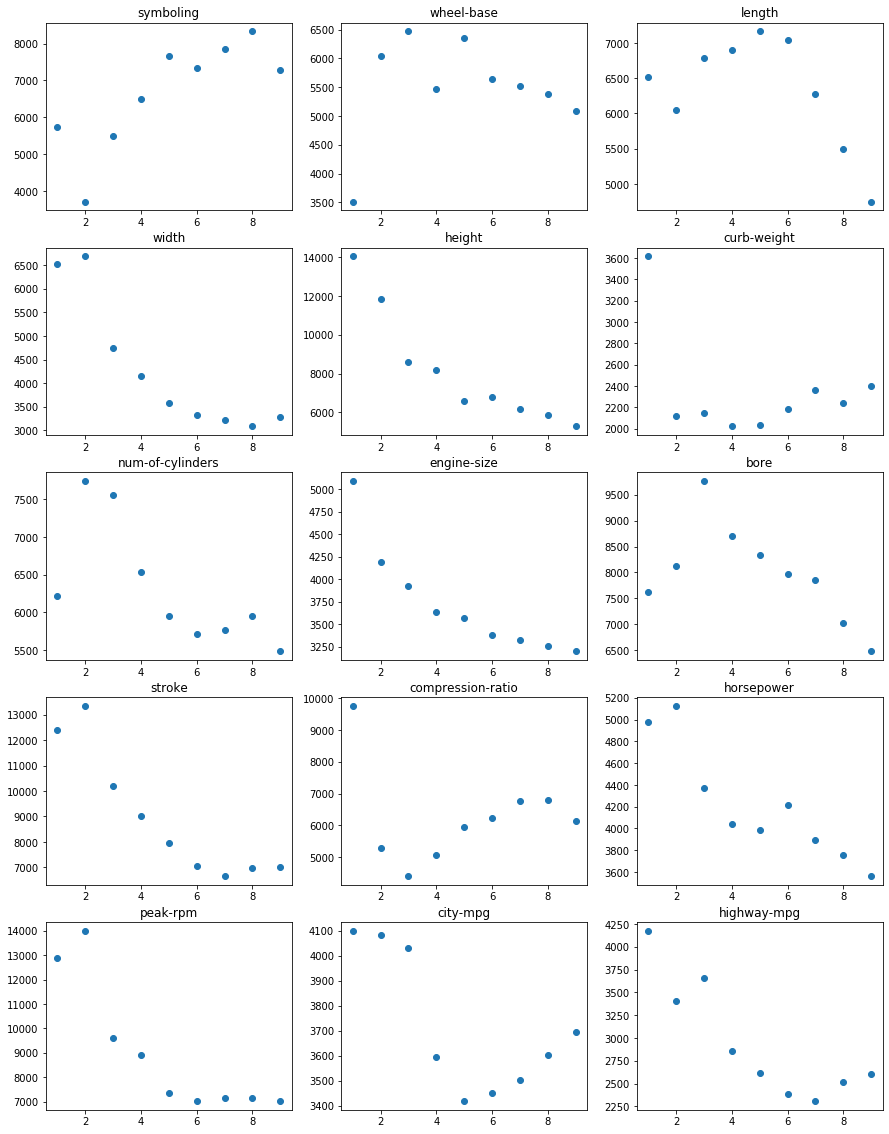

In [19]:
plt.figure(figsize=(15, 20))
for i in range(1,16):
    plt.subplot(5, 3, i)
    feature = dfRMSE.columns[i-1]
    plt.scatter(kList, dfRMSE[feature])
    plt.title(feature)
plt.show()

# 3. Multivariate Model

From the univariate models, we use 2-5 best features for the multivariate models.

In [20]:
feature_rmse = feature_rmse.sort_values()
feature_rmse

curb-weight          2038.626829
highway-mpg          2616.167428
city-mpg             3416.957208
engine-size          3564.610855
width                3588.722596
horsepower           3983.234793
num-of-cylinders     5951.742723
compression-ratio    5962.929580
wheel-base           6352.634733
height               6590.154368
length               7167.613517
peak-rpm             7352.024275
symboling            7665.310819
stroke               7974.519158
bore                 8327.983506
dtype: float64

In [21]:
# using 2 best features
two_rmse = knn_train_test(data, ['curb-weight', 'highway-mpg'], 'price')
two_rmse

2983.079468862843

In [22]:
# using 3 best features
three_rmse = knn_train_test(data, ['curb-weight', 'highway-mpg', 'city-mpg'], 'price')
three_rmse

2233.61174599274

In [23]:
# using 4 best features
four_rmse = knn_train_test(data, ['curb-weight', 'highway-mpg', 'city-mpg', 'engine-size'], 'price')
four_rmse

2250.8404770354614

In [24]:
# using 5 best features
five_rmse = knn_train_test(data, ['curb-weight', 'highway-mpg', 'city-mpg', 'engine-size', 'width'], 'price')
five_rmse

2245.2589005752197

# 4. Hyperparameter Tuning

We use the top 3 models of previous step and vary the hyperparameter k.

In [25]:
kList = list(range(1, 26))
k_tuning_result = pd.DataFrame(columns=['three_features', 'four_features', 'five_features'], index=kList)

In [26]:
features = ['curb-weight', 'highway-mpg', 'city-mpg', 'engine-size', 'width']
for i in range(3):
    for k in kList:
        rmse = knn_train_test(data, features[:3+i], 'price', k)
        k_tuning_result[k_tuning_result.columns[i]].loc[k] = rmse

In [27]:
k_tuning_result

,three_features,four_features,five_features
1,3857.71,3977.61,3517.15
2,2960.78,2405.47,2462.66
3,2605.44,2375.9,2444.6
4,2276.57,2290.8,2473.43
5,2233.61,2250.84,2245.26
6,2310.03,2183.6,2303.9
7,2301.16,2179.23,2260.09
8,2215.18,2130.5,2232.53
9,2181.24,2155.45,2205.89
10,2441.31,2096.14,2193.92


D:\Programs\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """


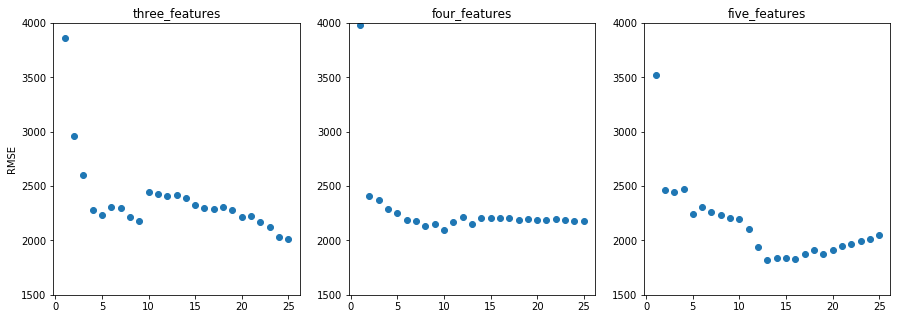

In [29]:
plt.figure(figsize=(15, 5))
plt.subplot(131)
plt.ylabel('RMSE')
for i in range(3):  
    plt.subplot(130+i+1)
    plt.scatter(kList, k_tuning_result[k_tuning_result.columns[i]])
    plt.title(k_tuning_result.columns[i])
    plt.ylim((1500, 4000))
plt.show()

So the best model is five_features model with k=13.